[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laiadc/MachineLearningHandsOn/blob/main/day2/Design%20and%20evaluate%20a%20model.ipynb)

# Creating and evaluating our first model

In this notebook we are going to design our first machine learning model under the machine learning pipeline. We are going to see how to evaluate the performance of a simple model and how to choose among different models. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The machine learning method

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

## Goal
 + Implement a full machine learning pipeline.
 + Understand the concepts of training, validation and test.
 

We start by importing the data and exploring it.

In [3]:
data = pd.read_csv("churn.csv")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Each column represents one of the variables we will use to classify if the client will churn.

To simplify the problem we will remove the non-numeric columns. The next cell uploads the numeric dataset.

In [4]:
dl=pd.read_csv('./churn_curated_numerical.csv',header=None)

In [5]:
dl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,415.0,0.0,1.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,0.0
3329,68.0,415.0,0.0,0.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,0.0
3330,28.0,510.0,0.0,0.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,0.0
3331,184.0,510.0,1.0,0.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,0.0


We separate from the dataset the explanatory variables (that we will use to create the predictive model) and the target variable (the value we want to predict).

In [8]:
data = dl.values
# Explanatory variables
X = data[:,:-1]
# Target variable
y = data[:,-1]

The following graph shows the distribution of the target variable.

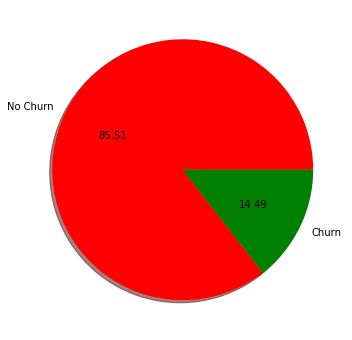

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],
        colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

## Creating a model with Scikit-Learn

Scikit-Learn (or sklearn) is a python library which is used to define and train machine learning models.

A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): in this case each sample is a client of the phone company. 
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. These are the variables which will be used to predict the target variable.

$${\rm feature~matrix:} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 


Once we have the training data we need to fit the model.

**Fitting the model** consists in finding the optimal parameters to predict the target variable given the explanatory variables. Let's look at an example. We will perform a one-dimensional linear regression. That is, given 20 pairs of data points $(x_i,y_i)$ we are going to find the parameters $(a,b)$ which best approximate

$$
y = ax + b
$$

The following plot shows the training data.

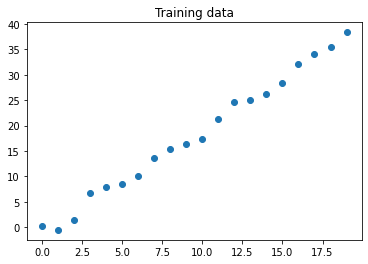

In [10]:
# Generate the (artificial) data

a = 2
b = -1
size=20
x_data = np.arange(size)
y_data = a*x_data + b + np.random.uniform(-2,2,size)

plt.plot(x_data,y_data, 'o')
plt.title('Training data')
plt.show()

Now we will fit the model to find the best estimation of $a$ and $b$. We will use the LinearRegression() class of sklearn

Coefficients of the linear regression: a=2.05, b=-1.33
True coefficients of the linear regression: a=2.00, b=-1.00


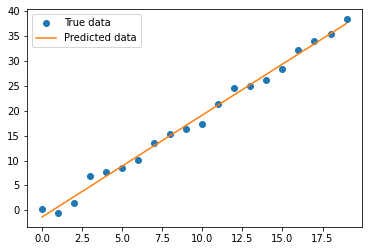

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_data.reshape(-1, 1),y_data)

a_hat = float(lm.coef_)
b_hat = float(lm.intercept_)

yhat = lm.predict(x_data.reshape(-1,1))

print('Coefficients of the linear regression: a={:.2f}, b={:.2f}'.format(a_hat,b_hat))
print('True coefficients of the linear regression: a={:.2f}, b={:.2f}'.format(a,b))

plt.plot(x_data, y_data, 'o', label="True data")
plt.plot(x_data, yhat,  label='Predicted data')
plt.legend()
plt.show()

## A model for churn prediction

Now we create and fit a model called K-nearest neighbours. We define and fit the model.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> Try to understand what the K-nearest neighbours algorithm does. </div>

In [12]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Predict the data you used for training/fiting the classifer

In [13]:
yhat = clf.predict(X)

How do we assess the performance of a model? How do we know how *good* a model is? One way to do it is by calculating the **accuracy of the model**. The accuracy of the model represents the % of success in the predictions. For example, an accuracy of 1.0 means that 100% of the observations (all of them) have been classified correctly. An accuracy of 0.9 means that the model classified correctly 90% of the observations, and so on. 

Luckily, it is very easy to calculate the accuracy of a model using python. `sklearn` reports this result using the function `accuracy_score`.

In [14]:
from sklearn import metrics

metrics.accuracy_score(y,yhat)

1.0

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this the value we expect to have when we apply this model to new data (new clients)?</div>

In real applications we will train a classifier on a given data set but then apply the classifier to unseen data. The performance of the model in unseen data will give us a better intution of the *true* performance of the model. Let us simulate this process by spliting the data set in two sets. We will call data we use for fiting the classifier **training data** and data used for assessing the performance, **test data**. 

Again, doing this with Python is easy, we just have to use the function `train_test_split`.

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)


Now we will train the decision tree model again, and look at the accuracy both in the training and test sets.

In [16]:
from sklearn import neighbors, metrics

clf = neighbors.KNeighborsClassifier(n_neighbors=1)#tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_train)
acc_train = metrics.accuracy_score(y_train,yhat)
print('The accuracy in the training set is: ', acc_train)

The accuracy in the training set is:  1.0


In [18]:
yhat = clf.predict(X_test)
from sklearn import metrics

acc_test = metrics.accuracy_score(y_test,yhat)
print('The accuracy in the test set is: ', acc_test)

The accuracy in the test set is:  0.811


<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> What is the accuracy you would expect to have in new data?</div>

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this result good? Would you use this model in production? Why?</div>

# Model selection (Intro)

We have tried a 1-Nearest Neighbors classifiers but we could try also different values for the Nearest Neighbors. The selection of a model between different alternatives is called model selection. The steps to perform model selection are the following:

1. Separate the data into training, validation and test sets.

For each model do:

2. Use the training data to fit the model.

3. Compute the predictions for the validation set and calculate the accuracy.

4. Choose the model with higher accuracy

5. In order to evaluate the performance of the selected model in unseen data, compute the predictions in the test set and calculate the accuracy for such predictions. 


Now we will use this scheme to compare different machine learning models. I suggest trying a 1-Nearest Neighbors, 3-Nearest Neighbors, decision trees. You can try all the models you wish (check classification models in sklearn).

In [17]:
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
    
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, train_size=0.7, random_state=42)

# MODEL: 1-NN
clf_nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_nn1.fit(X_train,y_train)

yhat_nn1_val = clf_nn1.predict(X_val)
acc_nn1_val = metrics.accuracy_score(y_val,yhat_nn1_val)

print('Accuracy 1-NN for validation={:.2f}'.format(acc_nn1_val))

# Repeat this process with other models and calculate the accuracy of every model

# MODEL: 3-NN
clf_nn3 = # your code here
clf_nn3.fit(X_train,y_train)

yhat_nn3_val = clf_nn3.predict(X_val)
acc_nn3_val = metrics.accuracy_score(y_val,yhat_nn3_val)

print('Accuracy 3-NN for validation={:.2f}'.format(acc_nn3_val))


# MODEL: Decision tree
clf_tree = # your code here
clf_tree.fit(X_train,y_train)

yhat_tree_val = clf_tree.predict(X_val)
acc_tree_val = metrics.accuracy_score(y_val,yhat_tree_val)

print('Accuracy Decision Tree for validation={:.2f}'.format(acc_tree_val))


Accuracy 1-NN for validation=0.80


<div class = "alert alert-info" style = "border-radius:10px" ><b>QUIZ:</b > What is the best of all the methods?</div>

<div class = "alert alert-info" style = "border-radius:10px"><b>QUIZ:</b> What is the expected accuracy of the selected method in exploitation over unseen data? </div>

To answer this question you have to calculate the accuracy for the predictions in your test data of the model you have chosen.

In [ ]:
yhat_best_model_test = # your code here
acc_best_model_test = metrics.accuracy_score(y_test,yhat_best_model_test)

print('Accuracy decision tree for test={:.2f}'.format(acc_best_model_test))